In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv('C:\College\TBoN\data\complete_dataset.csv')
del df['Unnamed: 0']
df

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892
...,...,...,...,...,...,...,...
59,Western,Nagarbhavi,12.959900,77.508300,623843,Bangalore,38627.411760
60,Western,Nandini Layout,13.016000,77.533800,638555,Bangalore,32490.969170
61,Western,Nayandahalli,12.941100,77.524800,474920,Bangalore,46826.803892
62,Western,Rajarajeshwari Nagar,12.924200,77.519100,516920,Bangalore,12533.785285


In [9]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [22]:
bangalore_population.to_csv('C:\College\TBoN\data\population_dataset.csv')
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [12]:
bangalore_income.to_csv('C:\College\TBoN\data\income_dataset.csv')
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [14]:
CLIENT_ID = 'WPNIEUR24OZPKGDJ1L4VV3OSCJOWKUUMM4QTVHNKUTALUPVP'
CLIENT_SECRET = 'K4U0R4H32LKK11JUUIUM03M3YKE50QVTPOKMZFPHWMEAX31S'
VERSION = '20180606'
LIMIT = 150

In [15]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [16]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
borough_colors

{'Central': '#11A745',
 'Eastern': '#03EE90',
 'NorthEastern': '#FCD3F9',
 'Northern': '#FD17C4',
 'SouthEastern': '#7161CB',
 'Southern': '#2F6810',
 'SouthernSuburbs': '#3022B1',
 'Western': '#EBB745'}

In [18]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)
bangalore_map

In [28]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)


In [29]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [30]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  591


In [31]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       114
Fast Food Restaurant     30
Café                     27
Bakery                   23
Ice Cream Shop           22
Department Store         22
Pizza Place              18
Coffee Shop              17
Chinese Restaurant       15
Restaurant               12
Name: Neighborhood, dtype: int64

In [32]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  125


In [33]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             6
        Domlur                     12
        Indiranagar                65
        Jeevanbheemanagar           4
        Malleswaram                 6
...                               ...
Western Nagarbhavi                  7
        Nandini Layout              1
        Nayandahalli                4
        Rajarajeshwari Nagar        6
        Vijayanagar                 4

[63 rows x 1 columns]

In [37]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [40]:
individual_bangalore_venue_count

Neighborhood  NumberOfVenues
Borough Neighborhood                                              
Central Cantonment area            Cantonment area               6
        Domlur                              Domlur              12
        Indiranagar                    Indiranagar              65
        Jeevanbheemanagar        Jeevanbheemanagar               4
        Malleswaram                    Malleswaram               6
...                                            ...             ...
Western Nagarbhavi                      Nagarbhavi               7
        Nandini Layout              Nandini Layout               1
        Nayandahalli                  Nayandahalli               4
        Rajarajeshwari Nagar  Rajarajeshwari Nagar               6
        Vijayanagar                    Vijayanagar               4

[63 rows x 2 columns]

[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasan

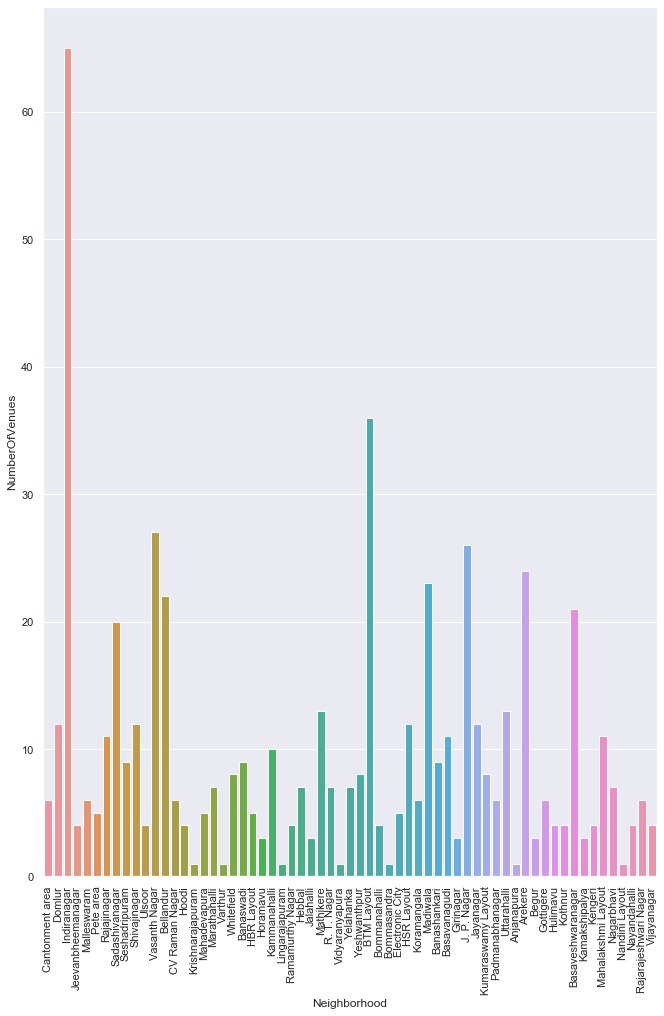

In [41]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

In [32]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
233,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
234,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
235,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
236,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
237,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
238,Whitefield,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
239,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
240,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
241,Whitefield,Eastern,12.9698,77.7499,burgundy restaurant,12.966812,77.751380,Swiss Restaurant


In [42]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,Arekere,0.000000,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.041667,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,BTM Layout,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.055556,0.0,0.0,0.0
3,Banashankari,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.111111,0.000000,0.0,0.0,0.0
4,Banaswadi,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.111111,0.0,0.0,0.0,0.000000,0.000000,0.111111,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Vidyaranyapura,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
59,Vijayanagar,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
60,Whitefield,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
61,Yelahanka,0.285714,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.142857,0.000000,0.000000,0.0,0.0,0.0


In [44]:
number_of_top_venues = 5

In [45]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [47]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Flower Shop,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Supermarket,Venue Category_Bus Line,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,Venue Category_Liquor Store
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Pizza Place,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,Venue Category_Bakery
3,Banashankari,Venue Category_Café,Venue Category_Shoe Store,Venue Category_Udupi Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Donut Shop,Venue Category_Falafel Restaurant
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Convenience Store,Venue Category_Bakery,Venue Category_Dessert Shop,Venue Category_Tea Room,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Market,Venue Category_Department Store,Venue Category_Deli / Bodega,Venue Category_Dim Sum Restaurant


In [48]:
neighborhoods_venues_sorted.shape

(63, 11)

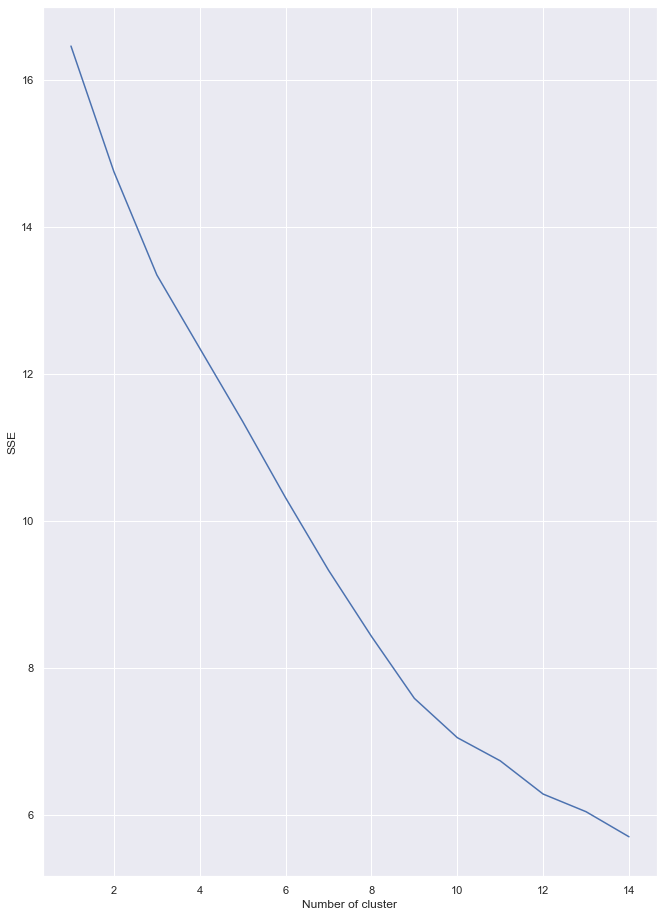

In [49]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [50]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [51]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [52]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [53]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     7
1    25
2     6
3    22
4     3
Name: Neighborhood, dtype: int64

In [54]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Flower Shop,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,2
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Supermarket,Venue Category_Bus Line,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,3
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Pizza Place,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,...,0.0,0.0,0.0,0.0,0.000000,0.055556,0.0,0.0,0.0,3
3,Banashankari,Venue Category_Café,Venue Category_Shoe Store,Venue Category_Udupi Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Donut Shop,...,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,3


In [49]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [64]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)
map_clusters

In [68]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,2
1,Arekere,0.000000,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.041667,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,3
2,BTM Layout,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.055556,0.0,0.0,0.0,3
3,Banashankari,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.111111,0.000000,0.0,0.0,0.0,3
4,Banaswadi,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.111111,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Vidyaranyapura,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,3
59,Vijayanagar,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
60,Whitefield,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,3
61,Yelahanka,0.285714,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.142857,0.000000,0.000000,0.0,0.0,0.0,3


In [72]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)
bangalore_veg

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1
...,...,...
58,Vidyaranyapura,0
59,Vijayanagar,0
60,Whitefield,0
61,Yelahanka,0


In [73]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [75]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,60,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel Bar,Venue Category_Café,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel,Venue Category_Dim Sum Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [77]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']
print("The target cluster is : ",target_cluster)

The target cluster is :  3


In [79]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Supermarket,Venue Category_Bus Line,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Pizza Place,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,...,0.000000,0.0,0.000000,0.000000,0.000000,0.055556,0.000000,0.00,0.00,3
3,Banashankari,Venue Category_Café,Venue Category_Shoe Store,Venue Category_Udupi Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Donut Shop,...,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.00,3
8,Bellandur,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Shopping Mall,Venue Category_Tea Room,Venue Category_Breakfast Spot,Venue Category_Restaurant,Venue Category_Punjabi Restaurant,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
14,Electronic City,Venue Category_Outlet Store,Venue Category_Bus Stop,Venue Category_Toll Plaza,Venue Category_Auto Garage,Venue Category_Furniture / Home Store,Venue Category_Yoga Studio,Venue Category_Eastern European Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
17,HBR Layout,Venue Category_Café,Venue Category_Road,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Kitchen Supply Store,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,Venue Category_Eastern European Restaurant,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
18,HSR Layout,Venue Category_Department Store,Venue Category_Pharmacy,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Badminton Court,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
23,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Ice Cream Shop,Venue Category_Restaurant,Venue Category_Cocktail Bar,Venue Category_Gym,Venue Category_Department Store,...,0.015385,0.0,0.015385,0.000000,0.015385,0.000000,0.015385,0.00,0.00,3
29,Kammanahalli,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Snack Place,Venue Category_Korean Restaurant,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Market,Venue Category_Indian Restaurant,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
31,Koramangala,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Hotel Bar,Venue Category_Breakfast Spot,Venue Category_Hotel,Venue Category_Athletics & Sports,Venue Category_Deli / Bodega,Venue Category

In [80]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 22 neighborhoods which has similar characteristics to Whitefield.


In [82]:
possible_neighborhoods.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Supermarket,Venue Category_Bus Line,Venue Category_Fast Food Restaurant,Venue Category_Department Store,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
1,2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Pizza Place,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,...,0.000000,0.0,0.000000,0.000000,0.000000,0.055556,0.000000,0.00,0.00,3
2,3,Banashankari,Venue Category_Café,Venue Category_Shoe Store,Venue Category_Udupi Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Miscellaneous Shop,...,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.00,3
3,8,Bellandur,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Shopping Mall,Venue Category_Tea Room,Venue Category_Breakfast Spot,Venue Category_Restaurant,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
4,14,Electronic City,Venue Category_Outlet Store,Venue Category_Bus Stop,Venue Category_Toll Plaza,Venue Category_Auto Garage,Venue Category_Furniture / Home Store,Venue Category_Yoga Studio,Venue Category_Eastern European Restaurant,Venue Category_Fast Food Restaurant,...,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
5,17,HBR Layout,Venue Category_Café,Venue Category_Road,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Kitchen Supply Store,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
6,18,HSR Layout,Venue Category_Department Store,Venue Category_Pharmacy,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Badminton Court,Venue Category_Pizza Place,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
7,23,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Ice Cream Shop,Venue Category_Restaurant,Venue Category_Cocktail Bar,Venue Category_Gym,...,0.015385,0.0,0.015385,0.000000,0.015385,0.000000,0.015385,0.00,0.00,3
8,29,Kammanahalli,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Snack Place,Venue Category_Korean Restaurant,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Market,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3
9,31,Koramangala,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Hotel Bar,Venue Category_Breakfast Spot,Venue Category_Hotel,Venue Category_Athletics & Sports,Venue Category_Deli / Bodega,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,3


In [85]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')
possible_neighborhoods

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,AverageIncome_x,Normalized_income_x,NumberOfVegRestaurants_x,NumberOfNonVeganrestaurants_x,Population_y,Normalized_population_y,AverageIncome_y,Normalized_income_y,NumberOfVegRestaurants_y,NumberOfNonVeganrestaurants_y
0,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Supermarket,Venue Category_Bus Line,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,29378.716626,0.454466,0,1.0,138760,0.141072,29378.716626,0.454466,0,1.0
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Pizza Place,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,...,49310.618884,0.762797,2,0.0,835743,0.849666,49310.618884,0.762797,2,0.0
2,Banashankari,Venue Category_Café,Venue Category_Shoe Store,Venue Category_Udupi Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Donut Shop,...,57524.209528,0.889855,0,1.0,810407,0.823908,57524.209528,0.889855,0,1.0
3,Bellandur,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Shopping Mall,Venue Category_Tea Room,Venue Category_Breakfast Spot,Venue Category_Restaurant,Venue Category_Punjabi Restaurant,...,7227.731930,0.111807,0,1.0,208094,0.211561,7227.731930,0.111807,0,1.0
4,Electronic City,Venue Category_Outlet Store,Venue Category_Bus Stop,Venue Category_Toll Plaza,Venue Category_Auto Garage,Venue Category_Furniture / Home Store,Venue Category_Yoga Studio,Venue Category_Eastern European Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,8350.934536,0.129182,0,1.0,781260,0.794275,8350.934536,0.129182,0,1.0
5,HBR Layout,Venue Category_Café,Venue Category_Road,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Kitchen Supply Store,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,Venue Category_Eastern European Restaurant,...,43625.383678,0.674851,0,1.0,822101,0.835796,43625.383678,0.674851,0,1.0
6,HSR Layout,Venue Category_Department Store,Venue Category_Pharmacy,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Badminton Court,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,...,45739.216291,0.707550,0,1.0,534598,0.543504,45739.216291,0.707550,0,1.0
7,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Ice Cream Shop,Venue Category_Restaurant,Venue Category_Cocktail Bar,Venue Category_Gym,Venue Category_Department Store,...,41991.817435,0.649581,0,1.0,474289,0.482190,41991.817435,0.649581,0,1.0
8,Kammanahalli,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Snack Place,Venue Category_Korean Restaurant,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Market,Venue Category_Indian Restaurant,...,23146.347761,0.358056,0,1.0,730628,0.742800,23146.347761,0.358056,0,1.0
9,Koramangala,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Hotel Bar,Venue Category_Breakfast Spot,Venue Category_Hotel,Venue Category_Athletics & Sports,Venue Category_Deli / Bodega,Venue Category_Dessert Shop,...,40110.283715,0.620475,0,1.0,288089,0.292888,40110.283

In [ ]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)
recommended_neighborhoods.head()

In [79]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [80]:
top3_df = pd.DataFrame(top3).reset_index()

In [81]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,[0.7361321887351776]
1,Hulimavu,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Badminton Court,[0.7638135476902764]
2,Kamakshipalya,Venue Category_South Indian Restaurant,Venue Category_Yoga Studio,Venue Category_Food Truck,[0.80418735993893]


#### Here, according the data, we see that 'Begur,Hulimavu and kamakshipalya' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !
#### Here our model will recommend these neighborneeds and top 3 common venues to visit.